_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
3192,33,20200.0,3,0,1.6,2,1,2016,0
5275,17,2500.0,3,179,1.5,1,1,1998,0
5805,30,1650.0,1,300,1.5,3,1,1987,0
6447,43,2990.0,3,200,3.0,3,0,1997,2
927,49,13900.0,5,107,2.0,3,1,2008,0
353,74,15500.0,0,165,2.7,1,1,2005,1
8293,77,1800.0,2,300,1.3,3,1,1989,0
7172,39,6700.0,1,95,1.4,3,1,2008,0
3509,5,13900.0,2,80,3.0,3,1,2002,2
3655,76,1799.0,3,5,1.3,1,1,1987,2


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [0]:
X = df[df.columns.drop('price')]
y = df['price']

In [7]:
X.head()

,make,body,mileage,engV,engType,registration,year,drive
0,23,0,68,2.5,1,1,2010,1
1,50,3,173,1.8,1,1,2011,2
2,50,2,135,5.5,3,1,2008,2
3,50,5,162,1.8,0,1,2012,0
4,55,0,83,2.0,3,1,2013,1


In [0]:
y

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=.80, test_size=.20, random_state=42)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((6796, 8), (1699, 8), (6796,), (1699,))

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [10]:
def model_linear_print(X, Y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, 
                                                  train_size=.80, 
                                                  test_size=.20, 
                                                  random_state=42)
  
    mlin = LinearRegression()
    mlin.fit(xtrain, ytrain)

    ypred = mlin.predict(xtest)
  
    rmse = (mean_squared_error(ytest, ypred))**.5
    r2 = r2_score(ytest, ypred)
    b = mlin.intercept_
    m = pd.Series(mlin.coef_, xtrain.columns)
    co = mlin.coef_
  
    print('RMS Error: {}\n'.format(rmse))
    print('r^2 score: {}\n'.format(r2))
    print('Intercept (B): {}'.format(b))
    print('Coefficients: {}'.format(co))
    print(m.to_string())
    pass

model_linear_print(X[['year', 'engV', 'mileage']], y)

RMS Error: 22918.13996921295

r^2 score: 0.18771466870012743

Intercept (B): -2093989.6297425963
Coefficients: [1054.4272994   384.22539989  -46.79217913]
year       1054.427299
engV        384.225400
mileage     -46.792179


## 1.4 Report the Intercept and Coefficients for the fitted model.

In [0]:
^^

## 1.5 Use the test data to make predictions.

In [0]:
def model_linear_return(X, Y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, 
                                                  train_size=.80, 
                                                  test_size=.20, 
                                                  random_state=42)
  
    mlin = LinearRegression()
    mlin.fit(xtrain, ytrain)

    ypred = mlin.predict(xtest)
  
    rmse = (mean_squared_error(ytest, ypred))**.5
    r2 = r2_score(ytest, ypred)
    b = mlin.intercept_
    m = pd.Series(mlin.coef_, xtrain.columns)
    co = mlin.coef_
    return(r2, m, b, co, ypred, ytest)

R2, M, B, CO, Price_predict, Price_test = model_linear_return(X[['year', 'engV', 'mileage']],y)

In [12]:
print(Price_predict, Price_test)

[25853.35413335 12576.54846772 31210.92446701 ... 21546.72511953
  -396.24220983 21449.94531209] 8221    25500.0
4552     9300.0
1535     6500.0
4228     8100.0
5623    10999.0
4584     4900.0
3792    15999.0
7320     3650.0
5254     6800.0
3661     4700.0
1665    10000.0
730      8700.0
7603     7500.0
7309     7999.0
3898     7500.0
7457    16300.0
6934     5980.0
4162    10500.0
6602    38900.0
3593     6950.0
7237     9100.0
5214    26900.0
6646    20500.0
2420    21900.0
1427     6200.0
7380     8500.0
4098     1852.5
932     42700.0
3605    16000.0
5527    10500.0
         ...   
2955     4700.0
333     26900.0
1259    18300.0
2751     1699.0
8370     1600.0
2646    17000.0
1024    77777.0
7982     7800.0
752     10700.0
3113     7300.0
5652     1500.0
351     10500.0
1511     7450.0
6900     9700.0
4141     7950.0
2651     3400.0
5503    16500.0
7310    32000.0
2794    50250.0
7142     6400.0
3688     3250.0
3653     9700.0
561     14500.0
7374    40000.0
6685    11500.0
4791   

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [13]:
print(R2, (mean_squared_error(ytest, Price_predict))**.5)

0.18771466870012743 22918.13996921295


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

The mean change in price corresponding to a vehicle being one year newer.

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

The square root of the mean of squared errors between predicted and actual price.

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

The proportion of the variaility in price that can be explained by the variables that I chose.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [14]:
lny = np.log(y)
lny.head()

0     9.648595
1     9.928180
2    10.463103
3     9.786954
4     9.717158
Name: price, dtype: float64

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

In [0]:
target = lny
features = X.columns

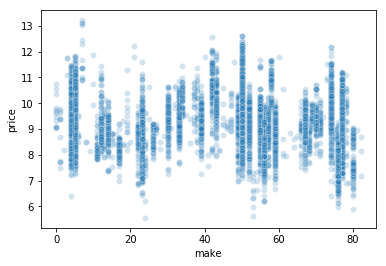

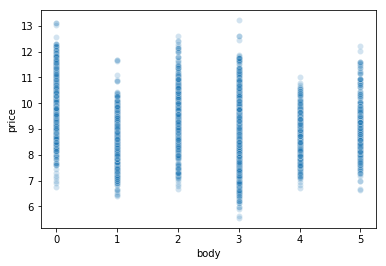

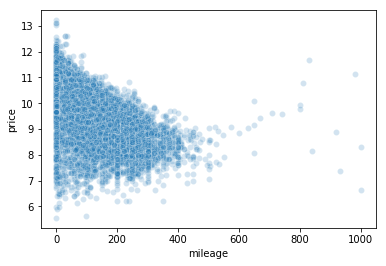

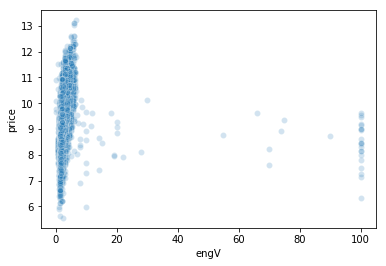

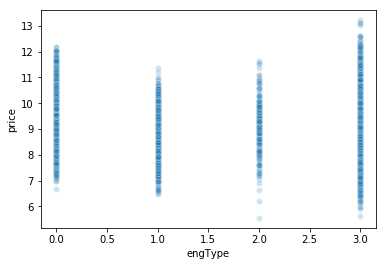

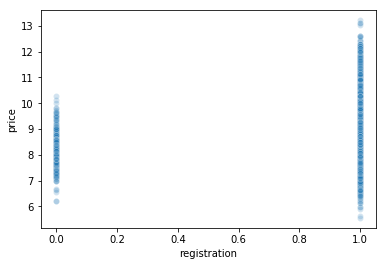

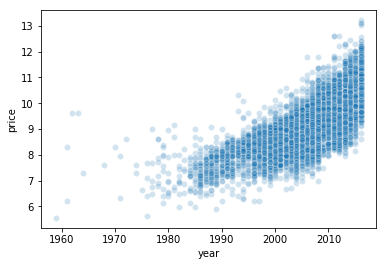

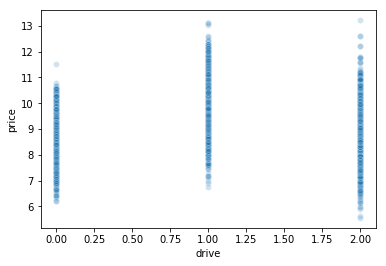

In [16]:
for f in features:
    sns.scatterplot(x=X[f], y=target, alpha=.2)
    plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [0]:
X['year_sq'] = X['year']**2
X['engVcube'] = X['engV']**3

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:
R2, M, B, CO, Price_predict, Price_test = model_linear_return(X[['year', 'engV', 'mileage', 'year_sq', 'engVcube']],y)
print('R^2: {}'.format(R2))
print('RMS Error: {}'.format((mean_squared_error(Price_predict, Price_test))))
print('Intercept: {}'.format(B))
print('Coefficients: \n', CO)


R^2: 0.2242077112180646
RMS Error: 501643954.64118415
Intercept: 305914158.2980055
Coefficients: 
 [-3.06911139e+05  6.12639550e+03 -1.59007479e+01  7.69747989e+01
 -6.17421643e-01]


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

The coefficient corresponds to x change over an order of magnitude (or in the case of ln e^n+1) increase in the target

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [19]:
# Graphviz isn't in the imports. I am guessing I am not required to graph this?

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(Xtrain, ytrain)
print('R^2 score: {}'.format(tree.score(Xtrain, ytrain)))
#plt.step(Xtest, tree.predict(Xtest).reshape(1,-1), where='mid')
#plt.show()
#display(tree_gviz(tree, ytest))
    

#def tree_gviz(dtree, feature_names):
#    dot = export_graphviz(dtree, out_file=None, feature_names=['feature'], filled=True, rounded=True)
#    return graphviz.Source(dot)

R^2 score: 0.6742565877739527


## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [20]:
# I used a depth of 3. Got decent R^2 with that. 

print('R^2 score: {}'.format(tree.score(Xtrain, ytrain)))


R^2 score: 0.6742565877739527


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [0]:
# Re defining lny and X in case anything happened since it was initialized earlier
lny = np.log(df['price'])
X = df[df.columns.drop('price')]

# Log linear:

lnlin = sm.OLS(lny, sm.add_constant(X[['year', 'engV', 'mileage']]))
results = lnlin.fit()
print(results.summary())

# Decided on columns based on earlier plots, found some that had good std errors

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     2769.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        13:52:25   Log-Likelihood:                -8824.6
No. Observations:                8495   AIC:                         1.766e+04
Df Residuals:                    8491   BIC:                         1.769e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -176.6121      2.495    -70.794      0.0

In [0]:
X.columns

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive', 'year_sq', 'engVcube'],
      dtype='object')

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [25]:
Xsm_const = sm.add_constant(X.drop(['year_sq', 'engVcube'], axis=1))
inflation = [variance_inflation_factor(Xsm_const.values, i) for i in range(len(Xsm_const.columns))]
pd.Series(inflation, Xsm_const.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           123262.013632
make                 1.059149
body                 1.158326
mileage              1.549610
engV                 1.009321
engType              1.141183
registration         1.091892
year                 1.458528
drive                1.131021
dtype: float64

In [0]:
Xsm_const

When I removed the engineered features, none of them had significant multicollinearity.
I would expect some dependence between mileage and year, but not a lot. Some people drive more than others